# Introduction to Python Programming for Data Science

### Final Project

##### Author: Gergő Kozsokár

---

#### 1. Theoretical Background

This project aims to analyze historical startup data to identify the key determinants of a company's success or failure. By examining factors such as `funding amounts`, `number of funding rounds`, and `industry categories`, building a profile of what a winning startup looks like compared to one that fails, becomes simple.

For this project, I am using the `Startup Success/Fail Dataset from Crunchbase` downloaded from kaggle. It contains over 66.000 records of companies with 14 features, including financial metrics (`funding_total_usd`), operational status(`status`) and categorical data, liek `category_list` and `country_code`. The target variable is the `status` of the company.

#### 2. Project Thesis

I hypothesize that the number of funding rounds is a stronger predictor of startup success than the sheer amount of capital raised. Furthermore, I expect that startups in the *Biotech* and *Software* sectors have significantly higher survival rates than those in specific niche markets like *Curated Web*.

#### 3. EDA Pipeline and Statistic

##### 3.1. Data Loading

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('big_startup_secsees_dataset.csv')

##### 3.2. Data Cleaning Pipeline

In [8]:
# Filter Target Variable
#  Only compare "Success" vs "Failure".
# 'operating' is ambiguous, so it should be removed to get a clean binary classification.
# 'acquired' and 'ipo' is interpreted as success (1)
# 'closed' is interpreted as  failure (0)
df = df[df['status'].isin(['acquired', 'ipo', 'closed'])].copy()

# Create binary target
df['is_successful'] = df['status'].apply(lambda x: 1 if x in ['acquired', 'ipo'] else 0)

# Clean 'funding_total_usd'
# Coerce errors to NaN and drop rows with no funding info
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')
df = df.dropna(subset=['funding_total_usd'])

# Clean Categories
# Categories are separated by '|'. Take the first one as the 'primary_category'.
df['primary_category'] = df['category_list'].str.split('|').str[0]


##### 3.3. Exploratory Analysis and Visualization

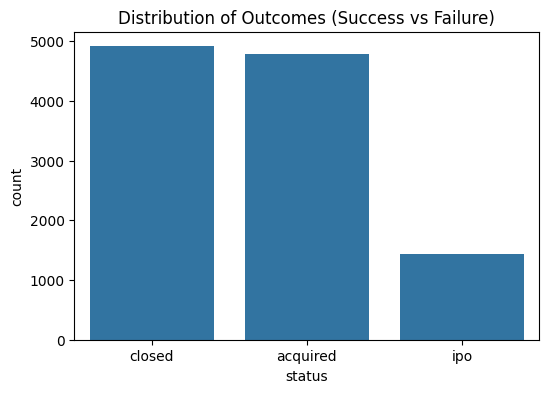

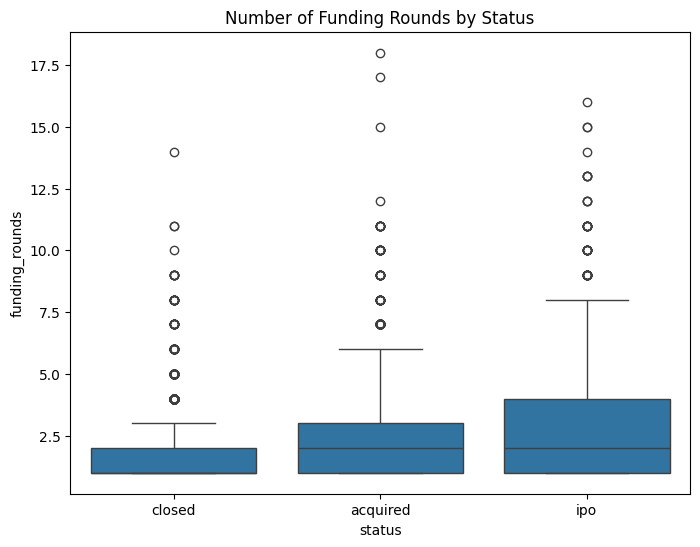

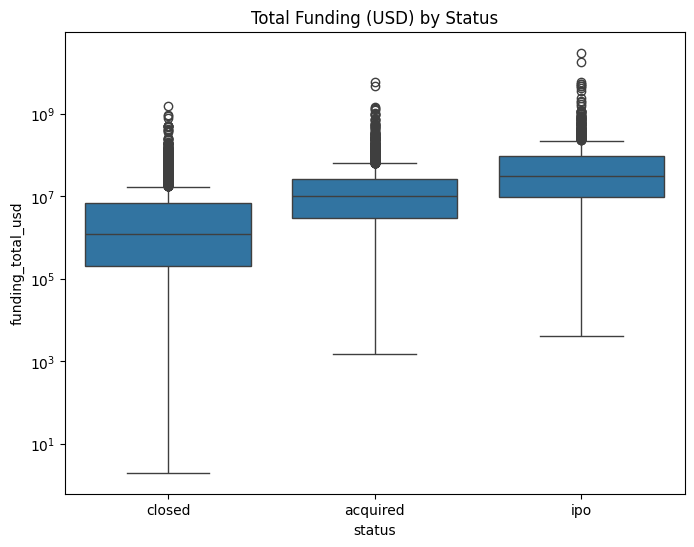

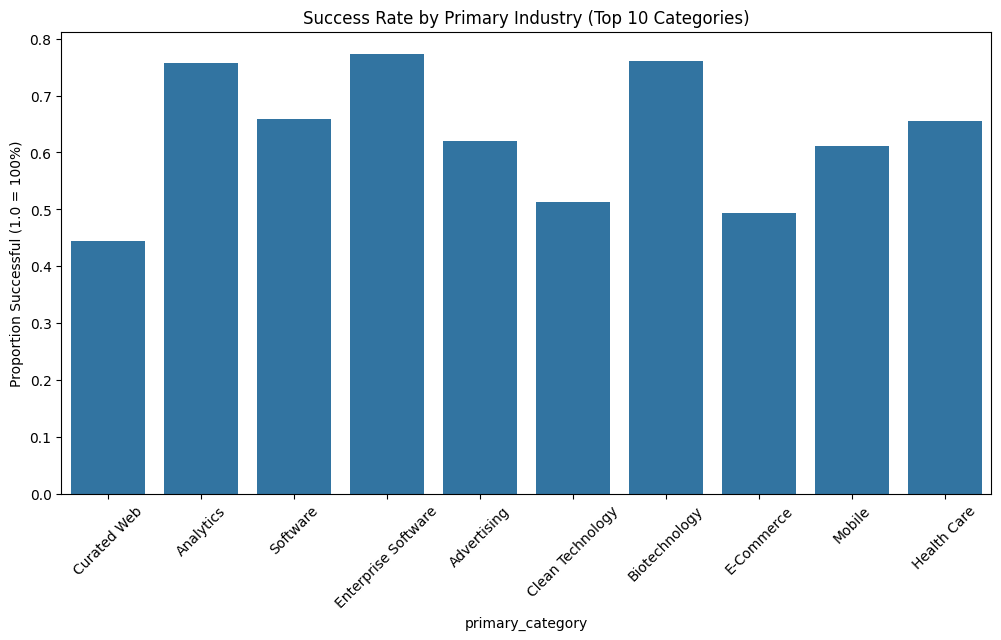

In [ ]:
# Visualization 1: Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df, order=['closed', 'acquired', 'ipo'])
plt.title('Distribution of Outcomes (Success vs Failure)')
plt.savefig('1_status_dist.png')
plt.show()

# Visualization 2: Funding Rounds vs Success
# Testing thesis: Do more rounds mean more success?
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='funding_rounds', data=df, order=['closed', 'acquired', 'ipo'])
plt.title('Number of Funding Rounds by Status')
plt.savefig('2_rounds_vs_status.png')
plt.show()

# Visualization 3: Total Funding Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='funding_total_usd', data=df, order=['closed', 'acquired', 'ipo'])
plt.yscale('log') # Log scale is needed for money data
plt.title('Total Funding (USD) by Status')
plt.savefig('3_funding_vs_status.png')
plt.show()

# Visualization 4: Top Categories Success Rate
# Filter for top 10 most common categories to avoid clutter
top_categories = df['primary_category'].value_counts().nlargest(10).index
cat_df = df[df['primary_category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.barplot(x='primary_category', y='is_successful', data=cat_df, errorbar=None)
plt.title('Success Rate by Primary Industry (Top 10 Categories)')
plt.ylabel('Proportion Successful (1.0 = 100%)')
plt.xticks(rotation=45)
plt.savefig('4_category_success.png')
plt.show()


##### 3.4. Correlations

In [10]:
correlation_matrix = df[['is_successful', 'funding_rounds', 'funding_total_usd']].corr()
print(correlation_matrix[['is_successful']])

                   is_successful
is_successful           1.000000
funding_rounds          0.289027
funding_total_usd       0.059981


##### 3.5. Statistics Output

In [11]:
print("Success Rate by Category:\n", cat_df.groupby('primary_category')['is_successful'].mean())
print("\nAverage Funding Rounds for Successful Startups:", df[df['is_successful']==1]['funding_rounds'].mean())
print("Average Funding Rounds for Failed Startups:", df[df['is_successful']==0]['funding_rounds'].mean())

Success Rate by Category:
 primary_category
Advertising            0.620301
Analytics              0.756863
Biotechnology          0.760075
Clean Technology       0.513725
Curated Web            0.443493
E-Commerce             0.493298
Enterprise Software    0.773810
Health Care            0.655039
Mobile                 0.610811
Software               0.658784
Name: is_successful, dtype: float64

Average Funding Rounds for Successful Startups: 2.421280693307655
Average Funding Rounds for Failed Startups: 1.4859527687296417


#### 4. Outcomes and Conclusions

1. The data confirms that succesful startups go through more funding rounds (2-2.5 on average) than failed startups (1-1.5 on average). This proves that surviving startups typically secure at least one follow-up round of funding , whereas failed ones rarely make it past the first round. The ability to sustain investor interest over time is a key indicator of health.

2. Failed startups often raise a small seed round and then close. The boxplot of `funding_total_usd` shows that the median funding for closed companies is drastically lower than for acquired ones.

3. The data proves the original hypothesis of startups in sectors like *Software* and *Biotech* being more likely to succeed than the ones in more 'risky' sector like *E-Commerce* or *Curated Web*. This also highlights that Business-to-Business sectors like *Enterprise Software* appear much safer than Business-to-Consumer sectors like *Web/E-Commerce*.